In [2]:
import pickle
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load in data
labels = pd.read_csv("param_test.csv", header=None, index_col=0) # Labels
print("Labels Shape:", labels.shape)

# Noiseless data
LE_XX = pd.read_csv("LE_XX_comps_test.csv", header=None, index_col=0)
LE_YY = pd.read_csv("LE_YY_comps_test.csv", header=None, index_col=0)
print("X and Y noisless:", LE_XX.shape, LE_YY.shape)

# Small Noise
s1_LE_XX = pd.read_csv("LE_XX_comps_test_s1.csv", header=None, index_col=0)
s1_LE_YY = pd.read_csv("LE_YY_comps_test_s1.csv", header=None, index_col=0)
m1_LE_XX = pd.read_csv("LE_XX_comps_test_m1.csv", header=None, index_col=0)
m1_LE_YY = pd.read_csv("LE_YY_comps_test_m1.csv", header=None, index_col=0)
l1_LE_XX = pd.read_csv("LE_XX_comps_test_l1.csv", header=None, index_col=0)
l1_LE_YY = pd.read_csv("LE_YY_comps_test_l1.csv", header=None, index_col=0)

print("\nNoisy Data Shapes")
print(s1_LE_XX.shape)
print(s1_LE_YY.shape)
print(m1_LE_XX.shape)
print(m1_LE_YY.shape)
print(l1_LE_XX.shape)
print(l1_LE_YY.shape)

# Initialize param set
params = []

# Read in data
with open("skin_parameters.csv", 'r') as param_file:
    reader = csv.reader(param_file, delimiter=',') 
    for row in reader:
        params.append(row) # Read each row and add it to params
        
# Get only the in vivo conditions and format so that each row is the range
in_vivo = np.array(params[5:9]).T

print(in_vivo)

# Get the max and min of each param
max_params = []
min_params = []
for element in in_vivo:
    max_params.append(max(map(float,element))) # Get the max element from each set
    min_params.append(min(map(float,element))) # Get the min element from each set

# Add the angle variation into the max and min sets
max_params.append(90)
min_params.append(0)

print("mu, k1, k2, kappa, and theta")
print(f'Max Values: {max_params}')
print(f'Min Values: {min_params}')

Labels Shape: (2800, 7)
X and Y noisless: (2800, 8) (2800, 8)

Noisy Data Shapes
(2800, 8)
(2800, 8)
(2800, 8)
(2800, 8)
(2800, 8)
(2800, 8)
[['0.000857' '0.000543' '0.00206' '0.00113']
 ['0.0203' '0.0188' '0.0117' '0.0225']
 ['13.27' '15.32' '8.71' '8.31']
 ['0.29' '0.28' '0.27' '0.3']]
mu, k1, k2, kappa, and theta
Max Values: [0.00206, 0.0225, 15.32, 0.3, 90]
Min Values: [0.000543, 0.0117, 8.31, 0.27, 0]


In [10]:
mean_params = np.array([1.3015e-3, 1.71e-2, 11.815, 0.285, 45, 0.05, 0.05]) # mu, k1, k2, kappa, theta

# Import GP Model's of both the noisy and noiseless case

with open('XX_GP.pkl', 'rb') as f:
    gpr_xx = pickle.load(f)

with open('YY_GP.pkl', 'rb') as f:
    gpr_yy = pickle.load(f)

with open('s1_noisy_XX_GP.pkl', 'rb') as f:
    s1_gpr_xx = pickle.load(f)

with open('s1_noisy_YY_GP.pkl', 'rb') as f:
    s1_gpr_yy = pickle.load(f)

# For plots, hold all parameters constant except the two that are changing
n_samples = 100
mu_samples = np.linspace(min_params[0], max_params[0], n_samples)
k1_samples = np.linspace(min_params[1], max_params[1], n_samples)
k2_samples = np.linspace(min_params[2], max_params[2], n_samples)
kappa_samples = np.linspace(min_params[3], max_params[3], n_samples)
theta_samples = np.linspace(min_params[4], max_params[4], n_samples)
a1_samples = np.linspace(-0.05, 0.05, n_samples)
a2_samples = np.linspace(-0.05, 0.05, n_samples)

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\k'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\k'
/var/folders/lt/36qhdtd13yvcmvls77tr_rjr0000gp/T/ipykernel_79479/1555687091.py:11: SyntaxWarning: invalid escape sequence '\m'
  var_names = ["$\mu$ (MPa)", "$k_1$ (MPa)", "$k_2$", "$\kappa$", "$\\theta$"]
/var/folders/lt/36qhdtd13yvcmvls77tr_rjr0000gp/T/ipykernel_79479/1555687091.py:11: SyntaxWarning: invalid escape sequence '\k'
  var_names = ["$\mu$ (MPa)", "$k_1$ (MPa)", "$k_2$", "$\kappa$", "$\\theta$"]


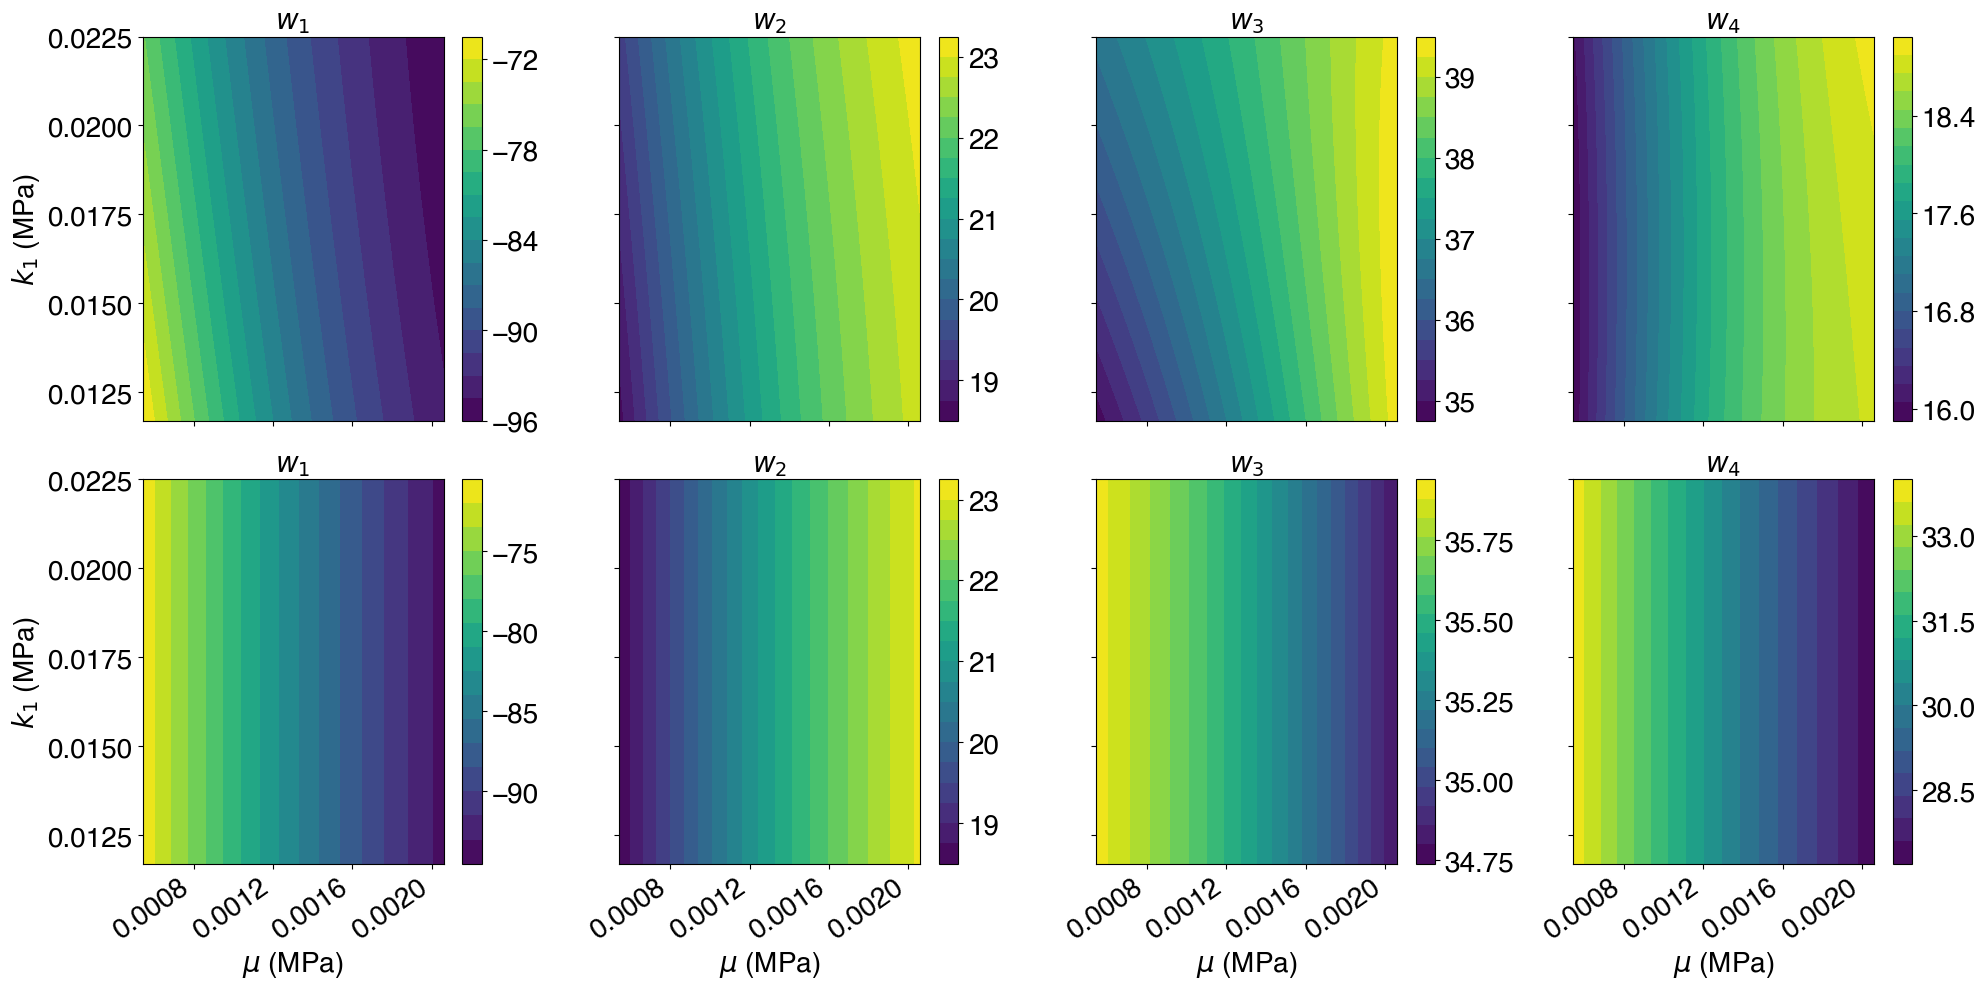

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Adjustable parameters
font_size = 20
tick_font_size = 20
plt.rcParams.update({'font.family': 'Helvetica'})

# Define variables
var_names = ["$\mu$ (MPa)", "$k_1$ (MPa)", "$k_2$", "$\kappa$", "$\\theta$"]

# Create sample points for mu and k1 (assuming these are your var1 and var2)
n_samples = 100
var1 = np.linspace(min_params[0], max_params[0], n_samples)  # mu
var2 = np.linspace(min_params[1], max_params[1], n_samples)  # k1
ind1 = 0
ind2 = 1

# Use mean values for other parameters
ind_array = [x for x in range(7) if (x != ind1) and (x != ind2)]
other_params = [mean_params[i] for i in ind_array]

# Generate all combinations of points using itertools.product
combinations = list(itertools.product(var1, var2))

# Prepare input arrays
inputs_12 = []
for pair in combinations:
    constructed_input = np.zeros(7)
    constructed_input[[ind1, ind2]] = pair
    constructed_input[ind_array] = other_params
    inputs_12.append(np.array(constructed_input))

inputs_12 = np.array(inputs_12)

# Get predictions for both noiseless and noisy data
xx_values = gpr_xx.predict(inputs_12)
s1_xx_values = s1_gpr_xx.predict(inputs_12)

# Reshape values to fit the grid format
xx_values = xx_values.reshape(len(var1), len(var2), 8)
s1_xx_values = s1_xx_values.reshape(len(var1), len(var2), 8)

# Create a 2x4 subplot figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Iterate through each of the 8 plots
for i in range(8):
    # Extract the data for the i-th variable
    if i < 4:  # First row: noiseless w1-w4
        xx_val = xx_values[:, :, i]
    else:  # Second row: noisy w1-w4
        xx_val = s1_xx_values[:, :, i-4]
    
    # Find the corresponding subplot in the grid
    ax = axes[i // 4, i % 4]
    
    # Create the contour plot
    contour = ax.contourf(var1, var2, xx_val.T, levels=20, cmap='viridis')
    
    # Add a colorbar for each subplot
    cbar = fig.colorbar(contour, ax=ax)
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    # Set axis labels and title
    if i < 4:
        ax.set_title(f'$w_{i+1}$', fontsize=font_size)
    else:
        ax.set_title(f'$w_{i-3}$', fontsize=font_size)
    
    ax.set_xlabel(var_names[ind1], fontsize=font_size)
    ax.set_ylabel(var_names[ind2], fontsize=font_size)
    
    # Set tick parameters
    ax.tick_params(axis='both', which='major', labelsize=tick_font_size)
    plt.setp(ax.get_xticklabels(), rotation=35, ha='right')
    
    # Reduce number of ticks
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    cbar.locator = plt.MaxNLocator(5)
    cbar.update_ticks()
    
    # Remove ticks and labels for non-edge plots
    if i % 4 != 0:  # Not first column
        ax.set_ylabel('')
        ax.set_yticklabels([])
    if i < 4:  # Not bottom row
        ax.set_xlabel('')
        ax.set_xticklabels([])

# Adjust layout
plt.tight_layout()
plt.show()